In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import gdown
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint
import scipy.stats as stats

# import geoprofile
import micro
import gtsa

## Download sample data

In [4]:
k13_dem_folder= '/home/adalvis/github/micro_diff/data/dems/k13_results'
m14_dem_folder='/home/adalvis/github/micro_diff/data/dems/m14_results/'

#load SfM data
k13_wsyr1_dem_files_sfm = sorted(Path(k13_dem_folder).glob('wsyr1/out/*sfm*.tif'))
k13_wsyr1_dem_files_sfm = [i.as_posix() for i in k13_wsyr1_dem_files_sfm]

k13_dsyr1_dem_files_sfm = sorted(Path(k13_dem_folder).glob('dsyr1/out/*sfm*.tif'))
k13_dsyr1_dem_files_sfm = [i.as_posix() for i in k13_dsyr1_dem_files_sfm]

k13_wsyr2_dem_files_sfm = sorted(Path(k13_dem_folder).glob('wsyr2/out/*sfm*.tif'))
k13_wsyr2_dem_files_sfm = [i.as_posix() for i in k13_wsyr2_dem_files_sfm]

m14_wsyr1_dem_files_sfm = sorted(Path(m14_dem_folder).glob('wsyr1/out/*sfm*.tif'))
m14_wsyr1_dem_files_sfm = [i.as_posix() for i in m14_wsyr1_dem_files_sfm]

m14_dsyr1_dem_files_sfm = sorted(Path(m14_dem_folder).glob('dsyr1/out/*sfm*.tif'))
m14_dsyr1_dem_files_sfm = [i.as_posix() for i in m14_dsyr1_dem_files_sfm]

m14_wsyr2_dem_files_sfm = sorted(Path(m14_dem_folder).glob('wsyr2/out/*sfm*.tif'))
m14_wsyr2_dem_files_sfm = [i.as_posix() for i in m14_wsyr2_dem_files_sfm]

m14_wsyr2_map_files_sfm = sorted(Path(m14_dem_folder).glob('wsyr2/out/map/*sfm*.tif'))
m14_wsyr2_map_files_sfm = [i.as_posix() for i in m14_wsyr2_map_files_sfm]

In [5]:
#load LiDAR data
k13_wsyr1_dem_files_lidar = sorted(Path(k13_dem_folder).glob('wsyr1/out/*lidar*.tif'))
k13_wsyr1_dem_files_lidar = [i.as_posix() for i in k13_wsyr1_dem_files_lidar]

k13_dsyr1_dem_files_lidar = sorted(Path(k13_dem_folder).glob('dsyr1/out/*lidar*.tif'))
k13_dsyr1_dem_files_lidar = [i.as_posix() for i in k13_dsyr1_dem_files_lidar]

k13_wsyr2_dem_files_lidar = sorted(Path(k13_dem_folder).glob('wsyr2/out/*lidar*.tif'))
k13_wsyr2_dem_files_lidar = [i.as_posix() for i in k13_wsyr2_dem_files_lidar]

m14_wsyr1_dem_files_lidar = sorted(Path(m14_dem_folder).glob('wsyr1/out/*lidar*.tif'))
m14_wsyr1_dem_files_lidar = [i.as_posix() for i in m14_wsyr1_dem_files_lidar]

m14_dsyr1_dem_files_lidar = sorted(Path(m14_dem_folder).glob('dsyr1/out/*lidar*.tif'))
m14_dsyr1_dem_files_lidar = [i.as_posix() for i in m14_dsyr1_dem_files_lidar]

m14_wsyr2_dem_files_lidar = sorted(Path(m14_dem_folder).glob('wsyr2/out/*lidar*.tif'))
m14_wsyr2_dem_files_lidar = [i.as_posix() for i in m14_wsyr2_dem_files_lidar]

m14_wsyr2_map_files_lidar = sorted(Path(m14_dem_folder).glob('wsyr2/out/map/*lidar*.tif'))
m14_wsyr2_map_files_lidar = [i.as_posix() for i in m14_wsyr2_map_files_lidar]


In [6]:
k13_wsyr1_dem_files_sfm, k13_dsyr1_dem_files_sfm, k13_wsyr2_dem_files_sfm, \
m14_wsyr1_dem_files_sfm, m14_dsyr1_dem_files_sfm, m14_wsyr2_dem_files_sfm, \
m14_wsyr2_map_files_sfm

(['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_202205

In [7]:
k13_wsyr1_dem_files_lidar, k13_dsyr1_dem_files_lidar, k13_wsyr2_dem_files_lidar, \
m14_wsyr1_dem_files_lidar, m14_dsyr1_dem_files_lidar, m14_wsyr2_dem_files_lidar, \
m14_wsyr2_map_files_lidar

(['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_lidar_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_lidar_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_lidar_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_lidar_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_lidar_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_lidar_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20201203_lidar_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210603_lidar_drainage.tif',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210914_lidar_drainage.tif'],
 ['/home/adalvis/github/micro_diff/data/dems/m14_results/ws

## Parse time stamps

#### KID-13 Wet1

In [8]:
strings_k13_wsyr1_sfm = gtsa.io.parse_timestamps(k13_wsyr1_dem_files_sfm, date_string_pattern='_........_')
date_strings_k13_wsyr1_sfm = [x[1:-1] for x in strings_k13_wsyr1_sfm]

# ensure chronological sorting
date_strings_k13_wsyr1_sfm, k13_wsyr1_dem_files_sfm = list(zip(*sorted(zip(date_strings_k13_wsyr1_sfm, k13_wsyr1_dem_files_sfm))))
date_times_k13_wsyr1_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr1_sfm]
date_k13_wsyr1_sfm = [date_times_k13_wsyr1_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr1_sfm))]

list(zip(date_strings_k13_wsyr1_sfm, k13_wsyr1_dem_files_sfm))

[('20201109',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.tif'),
 ('20210208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.tif'),
 ('20210406',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.tif'),
 ('20210513',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.tif')]

In [9]:
strings_k13_wsyr1_lidar = gtsa.io.parse_timestamps(k13_wsyr1_dem_files_lidar, date_string_pattern='_........_')
date_strings_k13_wsyr1_lidar = [x[1:-1] for x in strings_k13_wsyr1_lidar]

# ensure chronological sorting
date_strings_k13_wsyr1_lidar, k13_wsyr1_dem_files_lidar = list(zip(*sorted(zip(date_strings_k13_wsyr1_lidar, k13_wsyr1_dem_files_lidar))))
date_times_k13_wsyr1_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr1_lidar]
date_k13_wsyr1_lidar = [date_times_k13_wsyr1_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr1_lidar))]

list(zip(date_strings_k13_wsyr1_lidar, k13_wsyr1_dem_files_lidar))

[('20201109',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_lidar_drainage.tif'),
 ('20210513',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_lidar_drainage.tif')]

#### KID-13 Dry1

In [10]:
strings_k13_dsyr1_sfm = gtsa.io.parse_timestamps(k13_dsyr1_dem_files_sfm, date_string_pattern='_........_')
date_strings_k13_dsyr1_sfm = [x[1:-1] for x in strings_k13_dsyr1_sfm]

# ensure chronological sorting
date_strings_k13_dsyr1_sfm, k13_dsyr1_dem_files_sfm = list(zip(*sorted(zip(date_strings_k13_dsyr1_sfm, k13_dsyr1_dem_files_sfm))))
date_times_k13_dsyr1_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_dsyr1_sfm]
date_k13_dsyr1_sfm = [date_times_k13_dsyr1_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_dsyr1_sfm))]

list(zip(date_strings_k13_dsyr1_sfm, k13_dsyr1_dem_files_sfm))

[('20210604',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.tif'),
 ('20210819',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.tif'),
 ('20210913',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.tif')]

In [11]:
strings_k13_dsyr1_lidar = gtsa.io.parse_timestamps(k13_dsyr1_dem_files_lidar, date_string_pattern='_........_')
date_strings_k13_dsyr1_lidar = [x[1:-1] for x in strings_k13_dsyr1_lidar]

# ensure chronological sorting
date_strings_k13_dsyr1_lidar, k13_dsyr1_dem_files_lidar = list(zip(*sorted(zip(date_strings_k13_dsyr1_lidar, k13_dsyr1_dem_files_lidar))))
date_times_k13_dsyr1_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_dsyr1_lidar]
date_k13_dsyr1_lidar = [date_times_k13_dsyr1_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_dsyr1_lidar))]

list(zip(date_strings_k13_dsyr1_lidar, k13_dsyr1_dem_files_lidar))

[('20210604',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_lidar_drainage.tif'),
 ('20210913',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_lidar_drainage.tif')]

#### KID-13 Wet2

In [12]:
strings_k13_wsyr2_sfm = gtsa.io.parse_timestamps(k13_wsyr2_dem_files_sfm, date_string_pattern='_........_')
date_strings_k13_wsyr2_sfm = [x[1:-1] for x in strings_k13_wsyr2_sfm]

# ensure chronological sorting
date_strings_k13_wsyr2_sfm, k13_wsyr2_dem_files_sfm = list(zip(*sorted(zip(date_strings_k13_wsyr2_sfm, k13_wsyr2_dem_files_sfm))))
date_times_k13_wsyr2_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr2_sfm]
date_k13_wsyr2_sfm = [date_times_k13_wsyr2_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr2_sfm))]

list(zip(date_strings_k13_wsyr2_sfm, k13_wsyr2_dem_files_sfm))

[('20211007',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.tif'),
 ('20220208',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.tif'),
 ('20220503',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220503_sfm_drainage.tif'),
 ('20220531',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_sfm_drainage.tif')]

In [13]:
strings_k13_wsyr2_lidar = gtsa.io.parse_timestamps(k13_wsyr2_dem_files_lidar, date_string_pattern='_........_')
date_strings_k13_wsyr2_lidar = [x[1:-1] for x in strings_k13_wsyr2_lidar]

# ensure chronological sorting
date_strings_k13_wsyr2_lidar, k13_wsyr2_dem_files_lidar = list(zip(*sorted(zip(date_strings_k13_wsyr2_lidar, k13_wsyr2_dem_files_lidar))))
date_times_k13_wsyr2_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_k13_wsyr2_lidar]
date_k13_wsyr2_lidar = [date_times_k13_wsyr2_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_k13_wsyr2_lidar))]

list(zip(date_strings_k13_wsyr2_lidar, k13_wsyr2_dem_files_lidar))

[('20211007',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_lidar_drainage.tif'),
 ('20220531',
  '/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_lidar_drainage.tif')]

#### MEL-14 Wet1

In [14]:
strings_m14_wsyr1_sfm = gtsa.io.parse_timestamps(m14_wsyr1_dem_files_sfm, date_string_pattern='_........_')
date_strings_m14_wsyr1_sfm = [x[1:-1] for x in strings_m14_wsyr1_sfm]

# ensure chronological sorting
date_strings_m14_wsyr1_sfm, m14_wsyr1_dem_files_sfm = list(zip(*sorted(zip(date_strings_m14_wsyr1_sfm, m14_wsyr1_dem_files_sfm))))
date_times_m14_wsyr1_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr1_sfm]
date_m14_wsyr1_sfm = [date_times_m14_wsyr1_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr1_sfm))]

list(zip(date_strings_m14_wsyr1_sfm, m14_wsyr1_dem_files_sfm))

[('20201203',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20201203_sfm_drainage.tif'),
 ('20210224',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20210224_sfm_drainage.tif')]

In [15]:
strings_m14_wsyr1_lidar = gtsa.io.parse_timestamps(m14_wsyr1_dem_files_lidar, date_string_pattern='_........_')
date_strings_m14_wsyr1_lidar = [x[1:-1] for x in strings_m14_wsyr1_lidar]

# ensure chronological sorting
date_strings_m14_wsyr1_lidar, m14_wsyr1_dem_files_lidar = list(zip(*sorted(zip(date_strings_m14_wsyr1_lidar, m14_wsyr1_dem_files_lidar))))
date_times_m14_wsyr1_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr1_lidar]
date_m14_wsyr1_lidar = [date_times_m14_wsyr1_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr1_lidar))]

list(zip(date_strings_m14_wsyr1_lidar, m14_wsyr1_dem_files_lidar))

[('20201203',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out/mg_m14_20201203_lidar_drainage.tif')]

#### MEL-14 Dry1

In [16]:
strings_m14_dsyr1_sfm = gtsa.io.parse_timestamps(m14_dsyr1_dem_files_sfm, date_string_pattern='_........_')
date_strings_m14_dsyr1_sfm = [x[1:-1] for x in strings_m14_dsyr1_sfm]

# ensure chronological sorting
date_strings_m14_dsyr1_sfm, m14_dsyr1_dem_files_sfm = list(zip(*sorted(zip(date_strings_m14_dsyr1_sfm, m14_dsyr1_dem_files_sfm))))
date_times_m14_dsyr1_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_dsyr1_sfm]
date_m14_dsyr1_sfm = [date_times_m14_dsyr1_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_dsyr1_sfm))]

list(zip(date_strings_m14_dsyr1_sfm, m14_dsyr1_dem_files_sfm))

[('20210603',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210603_sfm_drainage.tif'),
 ('20210914',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210914_sfm_drainage.tif')]

In [17]:
strings_m14_dsyr1_lidar = gtsa.io.parse_timestamps(m14_dsyr1_dem_files_lidar, date_string_pattern='_........_')
date_strings_m14_dsyr1_lidar = [x[1:-1] for x in strings_m14_dsyr1_lidar]

# ensure chronological sorting
date_strings_m14_dsyr1_lidar, m14_dsyr1_dem_files_lidar = list(zip(*sorted(zip(date_strings_m14_dsyr1_lidar, m14_dsyr1_dem_files_lidar))))
date_times_m14_dsyr1_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_dsyr1_lidar]
date_m14_dsyr1_lidar = [date_times_m14_dsyr1_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_dsyr1_lidar))]

list(zip(date_strings_m14_dsyr1_lidar, m14_dsyr1_dem_files_lidar))

[('20210603',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210603_lidar_drainage.tif'),
 ('20210914',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out/mg_m14_20210914_lidar_drainage.tif')]

#### MEL-14 Wet2

In [18]:
strings_m14_wsyr2_sfm = gtsa.io.parse_timestamps(m14_wsyr2_dem_files_sfm, date_string_pattern='_........_')
date_strings_m14_wsyr2_sfm = [x[1:-1] for x in strings_m14_wsyr2_sfm]

# ensure chronological sorting
date_strings_m14_wsyr2_sfm, m14_wsyr2_dem_files_sfm = list(zip(*sorted(zip(date_strings_m14_wsyr2_sfm, m14_wsyr2_dem_files_sfm))))
date_times_m14_wsyr2_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2_sfm]
date_m14_wsyr2_sfm = [date_times_m14_wsyr2_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2_sfm))]


list(zip(date_strings_m14_wsyr2_sfm, m14_wsyr2_dem_files_sfm))

[('20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220309_sfm_drainage.tif'),
 ('20220316',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220316_sfm_drainage.tif'),
 ('20220324',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220324_sfm_drainage.tif'),
 ('20220411',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220411_sfm_drainage.tif'),
 ('20220428',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220428_sfm_drainage.tif'),
 ('20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220601_sfm_drainage.tif')]

In [19]:
strings_m14_wsyr2_lidar = gtsa.io.parse_timestamps(m14_wsyr2_dem_files_lidar, date_string_pattern='_........_')
date_strings_m14_wsyr2_lidar = [x[1:-1] for x in strings_m14_wsyr2_lidar]

# ensure chronological sorting
date_strings_m14_wsyr2_lidar, m14_wsyr2_dem_files_lidar = list(zip(*sorted(zip(date_strings_m14_wsyr2_lidar, m14_wsyr2_dem_files_lidar))))
date_times_m14_wsyr2_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2_lidar]
date_m14_wsyr2_lidar = [date_times_m14_wsyr2_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2_lidar))]


list(zip(date_strings_m14_wsyr2_lidar, m14_wsyr2_dem_files_lidar))

[('20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220309_lidar_drainage.tif'),
 ('20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/mg_m14_20220601_lidar_drainage.tif')]

In [20]:
strings_m14_wsyr2_map_sfm = gtsa.io.parse_timestamps(m14_wsyr2_map_files_sfm, date_string_pattern='_........_')
date_strings_m14_wsyr2_map_sfm = [x[1:-1] for x in strings_m14_wsyr2_map_sfm]

# ensure chronological sorting
date_strings_m14_wsyr2_map_sfm, m14_wsyr2_map_files_sfm = list(zip(*sorted(zip(date_strings_m14_wsyr2_map_sfm, m14_wsyr2_map_files_sfm))))
date_times_m14_wsyr2_map_sfm = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2_map_sfm]
date_sfm = [date_times_m14_wsyr2_map_sfm[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2_map_sfm))]

list(zip(date_sfm, date_strings_m14_wsyr2_map_sfm, m14_wsyr2_map_files_sfm))

[('2022-03-09',
  '20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220309_sfm_drainage_map.tif'),
 ('2022-03-16',
  '20220316',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220316_sfm_drainage_map.tif'),
 ('2022-03-24',
  '20220324',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220324_sfm_drainage_map.tif'),
 ('2022-04-11',
  '20220411',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220411_sfm_drainage_map.tif'),
 ('2022-04-28',
  '20220428',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220428_sfm_drainage_map.tif'),
 ('2022-06-01',
  '20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220601_sfm_drainage_map.tif')]

In [21]:
strings_m14_wsyr2_map_lidar = gtsa.io.parse_timestamps(m14_wsyr2_map_files_lidar, date_string_pattern='_........_')
date_strings_m14_wsyr2_map_lidar = [x[1:-1] for x in strings_m14_wsyr2_map_lidar]

# ensure chronological sorting
date_strings_m14_wsyr2_map_lidar, m14_wsyr2_map_files_lidar = list(zip(*sorted(zip(date_strings_m14_wsyr2_map_lidar, m14_wsyr2_map_files_lidar))))
date_times_m14_wsyr2_map_lidar = [pd.to_datetime(x, format='%Y%m%d') for x in date_strings_m14_wsyr2_map_lidar]
date_lidar = [date_times_m14_wsyr2_map_lidar[x].strftime("%Y-%m-%d") for x in range(len(date_times_m14_wsyr2_map_lidar))]

list(zip(date_lidar, date_strings_m14_wsyr2_map_lidar, m14_wsyr2_map_files_lidar))

[('2022-03-09',
  '20220309',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220309_lidar_drainage_map.tif'),
 ('2022-06-01',
  '20220601',
  '/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map/mg_m14_20220601_lidar_drainage_map.tif')]

In [22]:
import glob
import os

from osgeo import gdal
import numpy as np

gdal.AllRegister()

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/k13_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds


# MEL-14
os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/dsyr1/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

os.chdir('/home/adalvis/github/micro_diff/data/dems/m14_results/wsyr2/out/map')           # change to directory with the tiff files

filenames = glob.glob('*.tif')

for fn in filenames:
    ds = gdal.Open(fn, 1)                      # pass 1 to modify the raster
    n = ds.RasterCount                         # get number of bands
    for i in range(1, n+1):
        band = ds.GetRasterBand(i)
        arr = band.ReadAsArray()               # read band as numpy array
        arr = np.where(arr == 18000, np.nan, arr)  # change 0 to np.nan
        band.WriteArray(arr)                   # write the new array
        band.SetNoDataValue(np.nan)            # set the NoData value
        band.FlushCache()                      # save changes
    del ds

/home/adalvis/miniforge3/envs/micro_diff/lib/python3.12/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


## Read & open DEMs

In [23]:
k13_mask_path = '/home/adalvis/github/micro_diff/data/vectors/kid_mask/west_boundary_k13.shp'
# grab shapefile crs to write to rasters
k13_crs = gpd.read_file(k13_mask_path).crs
k13_mask_gdf = gpd.read_file(k13_mask_path)

m14_mask_path = '/home/adalvis/github/micro_diff/data/vectors/mel_mask/west_boundary_m14.shp'
# grab shapefile crs to write to rasters
m14_crs = gpd.read_file(m14_mask_path).crs
m14_mask_gdf = gpd.read_file(m14_mask_path)

In [24]:
#Wet season year 1
k13_wsyr1_sfm = dict()
for i in range(len(k13_wsyr1_dem_files_sfm)):
    k13_wsyr1_sfm[i] = rio.open_rasterio(k13_wsyr1_dem_files_sfm[i]).squeeze()
    k13_wsyr1_sfm[i].rio.write_crs(k13_crs, inplace=True)

#Dry season year 1
k13_dsyr1_sfm = dict()
for i in range(len(k13_dsyr1_dem_files_sfm)):
    k13_dsyr1_sfm[i] = rio.open_rasterio(k13_dsyr1_dem_files_sfm[i]).squeeze()
    k13_dsyr1_sfm[i].rio.write_crs(k13_crs, inplace=True)

#Wet season year 2
k13_wsyr2_sfm = dict()
for i in range(len(k13_wsyr2_dem_files_sfm)):
    k13_wsyr2_sfm[i] = rio.open_rasterio(k13_wsyr2_dem_files_sfm[i]).squeeze()
    k13_wsyr2_sfm[i].rio.write_crs(k13_crs, inplace=True)

In [25]:
#Wet season year 1
k13_wsyr1_lidar = dict()
for i in range(len(k13_wsyr1_dem_files_lidar)):
    k13_wsyr1_lidar[i] = rio.open_rasterio(k13_wsyr1_dem_files_lidar[i]).squeeze()
    k13_wsyr1_lidar[i].rio.write_crs(k13_crs, inplace=True)

#Dry season year 1
k13_dsyr1_lidar = dict()
for i in range(len(k13_dsyr1_dem_files_lidar)):
    k13_dsyr1_lidar[i] = rio.open_rasterio(k13_dsyr1_dem_files_lidar[i]).squeeze()
    k13_dsyr1_lidar[i].rio.write_crs(k13_crs, inplace=True)

#Wet season year 2
k13_wsyr2_lidar = dict()
for i in range(len(k13_wsyr2_dem_files_lidar)):
    k13_wsyr2_lidar[i] = rio.open_rasterio(k13_wsyr2_dem_files_lidar[i]).squeeze()
    k13_wsyr2_lidar[i].rio.write_crs(k13_crs, inplace=True)

In [26]:
#Wet season year 1
m14_wsyr1_sfm = dict()
for i in range(len(m14_wsyr1_dem_files_sfm)):
    m14_wsyr1_sfm[i] = rio.open_rasterio(m14_wsyr1_dem_files_sfm[i]).squeeze()
    m14_wsyr1_sfm[i].rio.write_crs(m14_crs, inplace=True)

#Dry season year 1
m14_dsyr1_sfm = dict()
for i in range(len(m14_dsyr1_dem_files_sfm)):
    m14_dsyr1_sfm[i] = rio.open_rasterio(m14_dsyr1_dem_files_sfm[i]).squeeze()
    m14_dsyr1_sfm[i].rio.write_crs(m14_crs, inplace=True)

#Wet season year 2
m14_wsyr2_sfm = dict()
for i in range(len(m14_wsyr2_dem_files_sfm)):
    m14_wsyr2_sfm[i] = rio.open_rasterio(m14_wsyr2_dem_files_sfm[i]).squeeze()
    m14_wsyr2_sfm[i].rio.write_crs(m14_crs, inplace=True)

m14_wsyr2_map_sfm = dict()
for i in range(len(m14_wsyr2_map_files_sfm)):
    m14_wsyr2_map_sfm[i] = rio.open_rasterio(m14_wsyr2_map_files_sfm[i]).squeeze()
    m14_wsyr2_map_sfm[i].rio.write_crs(m14_crs, inplace=True)

In [27]:
#Wet season year 1
m14_wsyr1_lidar = dict()
for i in range(len(m14_wsyr1_dem_files_lidar)):
    m14_wsyr1_lidar[i] = rio.open_rasterio(m14_wsyr1_dem_files_lidar[i]).squeeze()
    m14_wsyr1_lidar[i].rio.write_crs(m14_crs, inplace=True)

#Dry season year 1
m14_dsyr1_lidar = dict()
for i in range(len(m14_dsyr1_dem_files_lidar)):
    m14_dsyr1_lidar[i] = rio.open_rasterio(m14_dsyr1_dem_files_lidar[i]).squeeze()
    m14_dsyr1_lidar[i].rio.write_crs(m14_crs, inplace=True)

#Wet season year 2
m14_wsyr2_lidar = dict()
for i in range(len(m14_wsyr2_dem_files_lidar)):
    m14_wsyr2_lidar[i] = rio.open_rasterio(m14_wsyr2_dem_files_lidar[i]).squeeze()
    m14_wsyr2_lidar[i].rio.write_crs(m14_crs, inplace=True)

m14_wsyr2_map_lidar = dict()
for i in range(len(m14_wsyr2_map_files_lidar)):
    m14_wsyr2_map_lidar[i] = rio.open_rasterio(m14_wsyr2_map_files_lidar[i]).squeeze()
    m14_wsyr2_map_lidar[i].rio.write_crs(m14_crs, inplace=True)

## Plot edge drainage

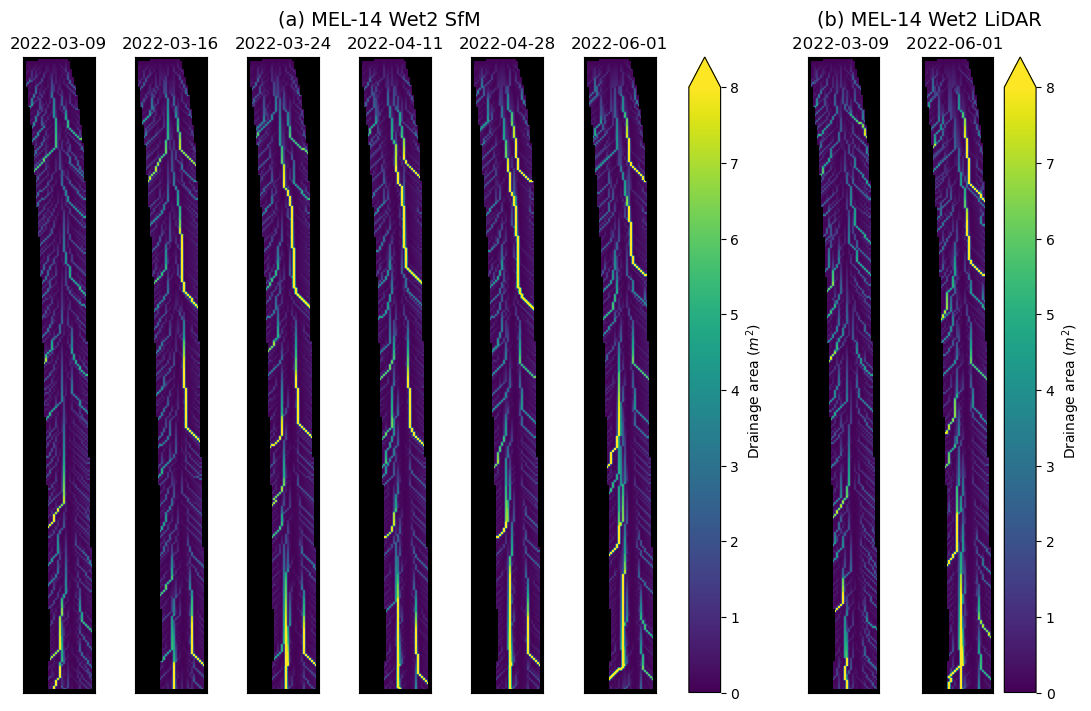

In [28]:
# extent = k13_wsyr1[0].rio.bounds()

# fig0, ax = plt.subplots(1, 4, figsize=(12,4))
# fig0.suptitle('KID-13 Wet1', x=0.6)
# for i in range(len(k13_wsyr1_dem_files)):
#     m0 = ax[i].imshow(k13_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig0.colorbar(m0, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig1, ax = plt.subplots(1, 3, figsize=(9,4))
# fig1.suptitle('KID-13 Dry1', x=0.6)
# for i in range(len(k13_dsyr1_dem_files)):
#     m1 = ax[i].imshow(k13_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_dsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig1.colorbar(m1, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig2, ax = plt.subplots(1, 4, figsize=(12,4))
# fig2.suptitle('KID-13 Wet2', x=0.6)
# for i in range(len(k13_wsyr2_dem_files)):
#     m2 = ax[i].imshow(k13_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=k13_wsyr2[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig2.colorbar(m2, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());



# fig3, ax = plt.subplots(1, 2, figsize=(6,4))
# fig3.suptitle('MEL-14 Wet1', x=0.6)
# for i in range(len(m14_wsyr1_dem_files)):
#     m3 = ax[i].imshow(m14_wsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig3.colorbar(m3, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig4, ax = plt.subplots(1, 2, figsize=(6,4))
# fig4.suptitle('MEL-14 Dry1', x=0.6)
# for i in range(len(m14_dsyr1_dem_files)):
#     m4 = ax[i].imshow(m14_dsyr1[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_dsyr1[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig4.colorbar(m4, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());

# fig5, ax = plt.subplots(1, 6, figsize=(18,4))
# fig5.suptitle('MEL-14 Wet2', x=0.55)
# for i in range(len(m14_wsyr2_dem_files)):
#     m5 = ax[i].imshow(m14_wsyr2[i], cmap = 'summer', vmin=0, vmax=5, extent=m14_wsyr2[i].rio.bounds())
#     ax[i].set_title('t=%i' %i)
#     fig5.colorbar(m5, label='Drainage area ($m^2$)', extend='max', ax=ax[i])
#     ax[i].set_facecolor('k')
#     # ax[i].set_xticks(())
#     # ax[i].set_yticks(());


fig = plt.figure(layout='constrained', figsize=(11,7))
subfigs = fig.subfigures(1, 2, wspace=0.0, width_ratios=(2.5,1))

ax1 = subfigs[0].subplots(1, 6)
subfigs[0].suptitle('(a) MEL-14 Wet2 SfM', fontsize=14)
m6 = ax1[0].imshow(m14_wsyr2_map_sfm[0], cmap = 'viridis', vmin=0, vmax=8)
subfigs[0].colorbar(m6, label='Drainage area ($m^2$)', extend='max', ax=ax1) 

for i in range(len(m14_wsyr2_map_files_sfm)):
    ax1[i].imshow(m14_wsyr2_map_sfm[i], cmap = 'viridis', vmin=0, vmax=8)
    ax1[i].set_title('%s' %date_m14_wsyr2_sfm[i], fontsize=12)
    ax1[i].set(facecolor='k')
    xax = ax1[i].get_xaxis()
    xax = xax.set_visible(False)
    yax = ax1[i].get_yaxis()
    yax = yax.set_visible(False)
# plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig8a.tif', dpi=900, bbox_inches='tight')


ax2 = subfigs[1].subplots(1, 2)
subfigs[1].suptitle('(b) MEL-14 Wet2 LiDAR', fontsize=14)
m7 = ax2[0].imshow(m14_wsyr2_map_sfm[0], cmap = 'viridis', vmin=0, vmax=8)
subfigs[1].colorbar(m7, label='Drainage area ($m^2$)', extend='max', ax=ax2) 



for i in range(len(m14_wsyr2_map_files_lidar)):
    ax2[i].imshow(m14_wsyr2_map_lidar[i], cmap = 'viridis', vmin=0, vmax=8)
    ax2[i].set_title('%s ' %date_m14_wsyr2_lidar[i], fontsize=12)
    ax2[i].set(facecolor='k')
    xax = ax2[i].get_xaxis()
    xax = xax.set_visible(False)
    yax = ax2[i].get_yaxis()
    yax = yax.set_visible(False)

plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig8.eps', bbox_inches='tight')
plt.show();


In [29]:
np.sum(m14_dsyr1_lidar[1], axis=1)

<xarray.DataArray (y: 318)> Size: 1kB
array([ 0.        ,  1.        ,  0.5625    ,  0.125     ,  0.25      ,
        0.25      ,  0.4375    ,  0.4375    ,  0.3125    ,  0.3125    ,
        0.1875    ,  1.25      ,  0.3125    ,  0.125     ,  1.1875    ,
        1.25      ,  0.3125    ,  1.6875    ,  0.3125    ,  0.25      ,
        0.9375    ,  0.125     ,  0.625     ,  0.125     ,  0.125     ,
        1.125     ,  0.25      ,  0.4375    ,  0.25      ,  0.125     ,
        5.0625    ,  0.375     ,  0.1875    ,  0.1875    ,  1.8125    ,
        0.6875    ,  0.25      ,  2.375     ,  0.25      ,  0.25      ,
        0.1875    ,  0.6875    ,  0.18749999,  0.1875    ,  5.4375    ,
        0.12499999,  0.1875    ,  0.1875    , 16.        ,  1.        ,
        0.4375    ,  0.25      ,  1.3125    ,  0.1875    ,  0.8125    ,
        0.375     ,  0.125     ,  0.125     ,  2.5625    ,  0.625     ,
        0.3125    ,  0.3125    ,  3.75      ,  0.125     ,  1.3125    ,
        1.5625    ,  0.1875    ,  0.6875    ,  0.375     ,  0.12499999,
        0.75      ,  0.1875    ,  0.25      ,  0.12499999,  0.1875    ,
       15.6875    ,  0.125     ,  0.5       ,  0.3125    ,  0.1875    ,
        4.625     ,  4.        ,  0.5       ,  0.1875    ,  0.5625    ,
        0.3125    ,  0.3125    ,  0.3125    ,  0.1875    ,  3.625     ,
        0.125     ,  1.375     ,  0.3125    ,  2.75      ,  0.3125    ,
        0.3125    ,  0.3125    ,  0.3125    ,  1.625     ,  0.125     ,
...
        0.1875    ,  0.1875    ,  0.3125    ,  1.4375    ,  0.8125    ,
        0.18749999,  0.375     ,  0.25      ,  0.3125    ,  0.375     ,
        0.5625    ,  0.1875    ,  0.5625    ,  0.1875    ,  0.375     ,
        0.375     ,  0.25      ,  0.375     ,  0.3125    ,  0.5       ,
        0.125     ,  0.1875    ,  0.875     ,  0.625     ,  0.3125    ,
        0.4375    ,  0.1875    ,  0.5       ,  0.12499999,  0.125     ,
        1.3125    ,  0.125     ,  0.125     ,  0.125     ,  6.1875    ,
        0.1875    ,  0.125     ,  0.12499999,  1.75      ,  0.375     ,
        1.        ,  0.1875    ,  0.12499999,  0.125     ,  0.12499999,
        0.125     , 33.        ,  0.125     ,  0.4375    ,  0.8125    ,
        0.125     ,  0.12499999,  0.125     ,  0.12499999,  1.0625    ,
        0.3125    ,  0.625     ,  0.1875    ,  0.5       ,  0.3125    ,
        0.1875    ,  0.4375    ,  0.25      ,  0.5625    ,  0.125     ,
        0.31249997,  0.3125    ,  0.4375    ,  0.1875    , 42.4375    ,
        0.5625    ,  0.625     ,  0.25      ,  0.625     ,  0.125     ,
        0.3125    ,  0.3125    ,  4.5625    ,  0.125     ,  0.375     ,
        0.4375    ,  0.125     ,  0.375     ,  0.375     ,  0.125     ,
        0.5       ,  0.375     ,  0.3125    ,  0.125     ,  0.375     ,
        0.125     ,  0.25      ,  0.24999999,  0.375     ,  0.25      ,
        0.1875    , 79.25      ,  0.        ], dtype=float32)
Coordinates:
    band         int64 8B 1
  * y            (y) float64 3kB 5.081e+03 5.08e+03 ... 5.002e+03 5.001e+03
    spatial_ref  int64 8B 0

In [30]:
t_k13_wsyr1_sfm = [0, 3, 5, 6]
cm_norm_k13_wsyr1_sfm = np.zeros(len(k13_wsyr1_dem_files_sfm))
cm_wa_k13_wsyr1_sfm = np.zeros(len(k13_wsyr1_dem_files_sfm))
for i in range(len(k13_wsyr1_dem_files_sfm)):
    cm_norm_k13_wsyr1_sfm[i] = np.sum(k13_wsyr1_sfm[i]['y']*np.sum(~np.isnan(k13_wsyr1_sfm[i]), axis =1))/np.sum(~np.isnan(k13_wsyr1_sfm[i])) - (stats.tmean(np.sum(~np.isnan(k13_wsyr1_sfm[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_wsyr1_sfm = np.sum(k13_wsyr1_sfm[i], axis=1)
    arr_wsyr1_sfm[-2] += arr_wsyr1_sfm[-5]
    arr_wsyr1_sfm[-5] = 0.0
    # arr_wsyr1_sfm[-2] = 0.0
    cm_wa_k13_wsyr1_sfm[i] = np.sum(k13_wsyr1_sfm[i]['y']*arr_wsyr1_sfm)/np.sum(k13_wsyr1_sfm[i])

t_k13_dsyr1_sfm = [0, 2.5, 3.5]
cm_norm_k13_dsyr1_sfm = np.zeros(len(k13_dsyr1_dem_files_sfm))
cm_wa_k13_dsyr1_sfm = np.zeros(len(k13_dsyr1_dem_files_sfm))
for i in range(len(k13_dsyr1_dem_files_sfm)):
    cm_norm_k13_dsyr1_sfm[i] = np.sum(k13_dsyr1_sfm[i]['y']*np.sum(~np.isnan(k13_dsyr1_sfm[i]), axis =1))/np.sum(~np.isnan(k13_dsyr1_sfm[i])) - (stats.tmean(np.sum(~np.isnan(k13_dsyr1_sfm[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_dsyr1_sfm = np.sum(k13_dsyr1_sfm[i], axis=1)
    arr_dsyr1_sfm[-2] += arr_dsyr1_sfm[-5]
    arr_dsyr1_sfm[-5] = 0.0
    # arr_dsyr1_sfm[-2] = 0.0
    cm_wa_k13_dsyr1_sfm[i] = np.sum(k13_dsyr1_sfm[i]['y']*arr_dsyr1_sfm)/np.sum(k13_dsyr1_sfm[i])

t_k13_wsyr2_sfm = [0,4,7,8]
cm_norm_k13_wsyr2_sfm = np.zeros(len(k13_wsyr2_dem_files_sfm))
cm_wa_k13_wsyr2_sfm = np.zeros(len(k13_wsyr2_dem_files_sfm))
for i in range(len(k13_wsyr2_dem_files_sfm)):
    cm_norm_k13_wsyr2_sfm[i] = np.sum(k13_wsyr2_sfm[i]['y']*np.sum(~np.isnan(k13_wsyr2_sfm[i]), axis =1))/np.sum(~np.isnan(k13_wsyr2_sfm[i])) - (stats.tmean(np.sum(~np.isnan(k13_wsyr2_sfm[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_wsyr2_sfm = np.sum(k13_wsyr2_sfm[i], axis=1)
    arr_wsyr2_sfm[-2] += arr_wsyr2_sfm[-5]
    arr_wsyr2_sfm[-5] = 0.0
    # arr_wsyr2_sfm[-2] = 0.0
    cm_wa_k13_wsyr2_sfm[i] = np.sum(k13_wsyr2_sfm[i]['y']*arr_wsyr2_sfm)/(np.sum(k13_wsyr2_sfm[i]))

In [31]:
t_k13_wsyr1_lidar = [0, 6]
cm_norm_k13_wsyr1_lidar = np.zeros(len(k13_wsyr1_dem_files_lidar))
cm_wa_k13_wsyr1_lidar = np.zeros(len(k13_wsyr1_dem_files_lidar))
for i in range(len(k13_wsyr1_dem_files_lidar)):
    cm_norm_k13_wsyr1_lidar[i] = np.sum(k13_wsyr1_lidar[i]['y']*np.sum(~np.isnan(k13_wsyr1_lidar[i]), axis =1))/np.sum(~np.isnan(k13_wsyr1_lidar[i])) - (stats.tmean(np.sum(~np.isnan(k13_wsyr1_lidar[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_wsyr1_lidar = np.sum(k13_wsyr1_lidar[i], axis=1)
    arr_wsyr1_lidar[-2] += arr_wsyr1_lidar[-5]
    arr_wsyr1_lidar[-5] = 0.0
    cm_wa_k13_wsyr1_lidar[i] = np.sum(k13_wsyr1_lidar[i]['y']*arr_wsyr1_lidar)/np.sum(k13_wsyr1_lidar[i])

t_k13_dsyr1_lidar = [0, 3.3]
cm_norm_k13_dsyr1_lidar = np.zeros(len(k13_dsyr1_dem_files_lidar))
cm_wa_k13_dsyr1_lidar = np.zeros(len(k13_dsyr1_dem_files_lidar))
for i in range(len(k13_dsyr1_dem_files_lidar)):
    cm_norm_k13_dsyr1_lidar[i] = np.sum(k13_dsyr1_lidar[i]['y']*np.sum(~np.isnan(k13_dsyr1_lidar[i]), axis =1))/np.sum(~np.isnan(k13_dsyr1_lidar[i])) - (stats.tmean(np.sum(~np.isnan(k13_dsyr1_lidar[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_dsyr1_lidar = np.sum(k13_dsyr1_lidar[i], axis=1)
    arr_dsyr1_lidar[-2] += arr_dsyr1_lidar[-5]
    arr_dsyr1_lidar[-5] = 0.0
    cm_wa_k13_dsyr1_lidar[i] = np.sum(k13_dsyr1_lidar[i]['y']*arr_dsyr1_lidar)/np.sum(k13_dsyr1_lidar[i])

t_k13_wsyr2_lidar = [0, 8]
cm_norm_k13_wsyr2_lidar = np.zeros(len(k13_wsyr2_dem_files_lidar))
cm_wa_k13_wsyr2_lidar = np.zeros(len(k13_wsyr2_dem_files_lidar))
for i in range(len(k13_wsyr2_dem_files_lidar)):
    cm_norm_k13_wsyr2_lidar[i] = np.sum(k13_wsyr2_lidar[i]['y']*np.sum(~np.isnan(k13_wsyr2_lidar[i]), axis =1))/np.sum(~np.isnan(k13_wsyr2_lidar[i])) - (stats.tmean(np.sum(~np.isnan(k13_wsyr2_lidar[i]), axis=1), limits=(1,None))*0.25*0.06)/(4*0.06)
    arr_wsyr2_lidar = np.sum(k13_wsyr2_lidar[i], axis=1)
    arr_wsyr2_lidar[-2] += arr_wsyr2_lidar[-4]
    arr_wsyr2_lidar[-4] = 0.0
    cm_wa_k13_wsyr2_lidar[i] = np.sum(k13_wsyr2_lidar[i]['y']*arr_wsyr2_lidar)/np.sum(k13_wsyr2_lidar[i])

In [32]:
cm_norm_k13_wsyr1_n_sfm = (cm_norm_k13_wsyr1_sfm-min(k13_wsyr1_sfm[3]['y'].values))/(max(k13_wsyr1_sfm[3]['y'].values)-min(k13_wsyr1_sfm[3]['y'].values))
cm_wa_k13_wsyr1_n_sfm = (cm_wa_k13_wsyr1_sfm-min(k13_wsyr1_sfm[3]['y'].values))/(max(k13_wsyr1_sfm[3]['y'].values)-min(k13_wsyr1_sfm[3]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_wsyr1_n_sfm.csv', cm_wa_k13_wsyr1_n_sfm, delimiter=",", fmt='%f')
cm_norm_k13_dsyr1_n_sfm = (cm_norm_k13_dsyr1_sfm-min(k13_dsyr1_sfm[2]['y'].values))/(max(k13_dsyr1_sfm[2]['y'].values)-min(k13_dsyr1_sfm[2]['y'].values))
cm_wa_k13_dsyr1_n_sfm = (cm_wa_k13_dsyr1_sfm-min(k13_dsyr1_sfm[2]['y'].values))/(max(k13_dsyr1_sfm[2]['y'].values)-min(k13_dsyr1_sfm[2]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_dsyr1_n_sfm.csv', cm_wa_k13_dsyr1_n_sfm, delimiter=",", fmt='%f')
cm_norm_k13_wsyr2_n_sfm = (cm_norm_k13_wsyr2_sfm-min(k13_wsyr2_sfm[3]['y'].values))/(max(k13_wsyr2_sfm[3]['y'].values)-min(k13_wsyr2_sfm[3]['y'].values))
cm_wa_k13_wsyr2_n_sfm = (cm_wa_k13_wsyr2_sfm-min(k13_wsyr2_sfm[3]['y'].values))/(max(k13_wsyr2_sfm[3]['y'].values)-min(k13_wsyr2_sfm[3]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_wsyr2_n_sfm.csv', cm_wa_k13_wsyr2_n_sfm, delimiter=",", fmt='%f')

tmax_k13_wsyr1_sfm = np.linspace(-0.25,8.25, 4)

In [33]:
cm_norm_k13_wsyr1_n_lidar = (cm_norm_k13_wsyr1_lidar-min(k13_wsyr1_lidar[1]['y'].values))/(max(k13_wsyr1_lidar[1]['y'].values)-min(k13_wsyr1_lidar[1]['y'].values))
cm_wa_k13_wsyr1_n_lidar = (cm_wa_k13_wsyr1_lidar-min(k13_wsyr1_lidar[1]['y'].values))/(max(k13_wsyr1_lidar[1]['y'].values)-min(k13_wsyr1_lidar[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_wsyr1_n_lidar.csv', cm_wa_k13_wsyr1_n_lidar, delimiter=",", fmt='%f')
cm_norm_k13_dsyr1_n_lidar = (cm_norm_k13_dsyr1_lidar-min(k13_dsyr1_lidar[1]['y'].values))/(max(k13_dsyr1_lidar[1]['y'].values)-min(k13_dsyr1_lidar[1]['y'].values))
cm_wa_k13_dsyr1_n_lidar = (cm_wa_k13_dsyr1_lidar-min(k13_dsyr1_lidar[1]['y'].values))/(max(k13_dsyr1_lidar[1]['y'].values)-min(k13_dsyr1_lidar[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_dsyr1_n_lidar.csv', cm_wa_k13_dsyr1_n_lidar, delimiter=",", fmt='%f')
cm_norm_k13_wsyr2_n_lidar = (cm_norm_k13_wsyr2_lidar-min(k13_wsyr2_lidar[1]['y'].values))/(max(k13_wsyr2_lidar[1]['y'].values)-min(k13_wsyr2_lidar[1]['y'].values))
cm_wa_k13_wsyr2_n_lidar = (cm_wa_k13_wsyr2_lidar-min(k13_wsyr2_lidar[1]['y'].values))/(max(k13_wsyr2_lidar[1]['y'].values)-min(k13_wsyr2_lidar[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_k13_wsyr2_n_lidar.csv', cm_wa_k13_wsyr2_n_lidar, delimiter=",", fmt='%f')

tmax_k13_wsyr1_lidar = np.linspace(-0.25,8.25, 4)

### MEL-14

In [34]:
t_m14_wsyr1_sfm = [0, 2.5]
cm_norm_m14_wsyr1_sfm = np.zeros(len(m14_wsyr1_dem_files_sfm))
cm_wa_m14_wsyr1_sfm = np.zeros(len(m14_wsyr1_dem_files_sfm))
for i in range(len(m14_wsyr1_dem_files_sfm)):
    cm_norm_m14_wsyr1_sfm[i] = np.sum(m14_wsyr1_sfm[i]['y']*np.sum(~np.isnan(m14_wsyr1_sfm[i]), axis =1))/np.sum(~np.isnan(m14_wsyr1_sfm[i])) - (stats.tmean(np.sum(~np.isnan(m14_wsyr1_sfm[i]), axis=1), limits=(1, None))*0.25*0.10)/(4*0.06)
    arr_wsyr1_sfm = np.sum(m14_wsyr1_sfm[i], axis=1)
    arr_wsyr1_sfm[-2] += arr_wsyr1_sfm[-7]
    arr_wsyr1_sfm[-7] = 0.0
    cm_wa_m14_wsyr1_sfm[i] = np.sum(m14_wsyr1_sfm[i]['y']*arr_wsyr1_sfm)/np.sum(m14_wsyr1_sfm[i])

t_m14_dsyr1_sfm = [0, 3.5]
cm_norm_m14_dsyr1_sfm = np.zeros(len(m14_dsyr1_dem_files_sfm))
cm_wa_m14_dsyr1_sfm = np.zeros(len(m14_dsyr1_dem_files_sfm))
for i in range(len(m14_dsyr1_dem_files_sfm)):
    cm_norm_m14_dsyr1_sfm[i] = np.sum(m14_dsyr1_sfm[i]['y']*np.sum(~np.isnan(m14_dsyr1_sfm[i]), axis =1))/np.sum(~np.isnan(m14_dsyr1_sfm[i])) - (stats.tmean(np.sum(~np.isnan(m14_dsyr1_sfm[i]) , axis=1), limits=(1,None))*0.25*0.10)/(4*0.06)
    arr_dsyr1_sfm = np.sum(m14_dsyr1_sfm[i], axis=1)
    arr_dsyr1_sfm[-2] += arr_dsyr1_sfm[-7]
    arr_dsyr1_sfm[-7] = 0.0
    cm_wa_m14_dsyr1_sfm[i] = np.sum(m14_dsyr1_sfm[i]['y']*arr_dsyr1_sfm)/np.sum(m14_dsyr1_sfm[i])

t_m14_wsyr2_sfm = [0,0.25,0.5,1,1.75,3]
cm_norm_m14_wsyr2_sfm = np.zeros(len(m14_wsyr2_dem_files_sfm))
cm_wa_m14_wsyr2_sfm = np.zeros(len(m14_wsyr2_dem_files_sfm))
for i in range(len(m14_wsyr2_dem_files_sfm)):
    cm_norm_m14_wsyr2_sfm[i] = np.sum(m14_wsyr2_sfm[i]['y']*np.sum(~np.isnan(m14_wsyr2_sfm[i]), axis =1))/np.sum(~np.isnan(m14_wsyr2_sfm[i])) - (stats.tmean(np.sum(~np.isnan(m14_wsyr2_sfm[i]), axis=1), limits=(1,None))*0.25*0.10)/(4*0.06)
    arr_wsyr2_sfm = np.sum(m14_wsyr2_sfm[i], axis=1)
    arr_wsyr2_sfm[-2] += arr_wsyr2_sfm[-7]
    arr_wsyr2_sfm[-7] = 0.0
    cm_wa_m14_wsyr2_sfm[i] = np.sum(m14_wsyr2_sfm[i]['y']*arr_wsyr2_sfm)/np.sum(m14_wsyr2_sfm[i])

In [35]:
t_m14_wsyr1_lidar = [0]
cm_norm_m14_wsyr1_lidar = np.zeros(len(m14_wsyr1_dem_files_lidar))
# arr_wsyr1 = np.zeros(len(m14_wsyr1_dem_files))
cm_wa_m14_wsyr1_lidar = np.zeros(len(m14_wsyr1_dem_files_lidar))
for i in range(len(m14_wsyr1_dem_files_lidar)):
    cm_norm_m14_wsyr1_lidar[i] = np.sum(m14_wsyr1_lidar[i]['y']*np.sum(~np.isnan(m14_wsyr1_lidar[i]), axis =1))/np.sum(~np.isnan(m14_wsyr1_lidar[i])) - (stats.tmean(np.sum(~np.isnan(m14_wsyr1_lidar[i]), axis=1), limits=(1, None))*0.25*0.10)/(4*0.06)
    arr_wsyr1_lidar = np.sum(m14_wsyr1_lidar[i], axis=1)
    arr_wsyr1_lidar[-2] += arr_wsyr1_lidar[-7]
    arr_wsyr1_lidar[-7] = 0.0
    cm_wa_m14_wsyr1_lidar[i] = np.sum(m14_wsyr1_lidar[i]['y']*arr_wsyr1_lidar)/np.sum(m14_wsyr1_lidar[i])

t_m14_dsyr1_lidar = [0, 3.5]
cm_norm_m14_dsyr1_lidar = np.zeros(len(m14_dsyr1_dem_files_lidar))
# arr_dsyr1 = np.zeros(len(m14_dsyr1_dem_files))
cm_wa_m14_dsyr1_lidar = np.zeros(len(m14_dsyr1_dem_files_lidar))
for i in range(len(m14_dsyr1_dem_files_lidar)):
    cm_norm_m14_dsyr1_lidar[i] = np.sum(m14_dsyr1_lidar[i]['y']*np.sum(~np.isnan(m14_dsyr1_lidar[i]), axis =1))/np.sum(~np.isnan(m14_dsyr1_lidar[i])) - (stats.tmean(np.sum(~np.isnan(m14_dsyr1_lidar[i]) , axis=1), limits=(1,None))*0.25*0.10)/(4*0.06)
    arr_dsyr1_lidar = np.sum(m14_dsyr1_lidar[i], axis=1)
    arr_dsyr1_lidar[-2] += arr_dsyr1_lidar[-7]
    arr_dsyr1_lidar[-7] = 0.0
    cm_wa_m14_dsyr1_lidar[i] = np.sum(m14_dsyr1_lidar[i]['y']*arr_dsyr1_lidar)/np.sum(m14_dsyr1_lidar[i])

t_m14_wsyr2_lidar = [0, 3]
cm_norm_m14_wsyr2_lidar = np.zeros(len(m14_wsyr2_dem_files_lidar))
# arr_wsyr2 = np.zeros(len(m14_wsyr2_dem_files))
cm_wa_m14_wsyr2_lidar = np.zeros(len(m14_wsyr2_dem_files_lidar))
for i in range(len(m14_wsyr2_dem_files_lidar)):
    cm_norm_m14_wsyr2_lidar[i] = np.sum(m14_wsyr2_lidar[i]['y']*np.sum(~np.isnan(m14_wsyr2_lidar[i]), axis =1))/np.sum(~np.isnan(m14_wsyr2_lidar[i])) - (stats.tmean(np.sum(~np.isnan(m14_wsyr2_lidar[i]), axis=1), limits=(1,None))*0.25*0.10)/(4*0.06)
    arr_wsyr2_lidar = np.sum(m14_wsyr2_lidar[i], axis=1)
    arr_wsyr2_lidar[-2] += arr_wsyr2_lidar[-7]
    arr_wsyr2_lidar[-7] = 0.0
    cm_wa_m14_wsyr2_lidar[i] = np.sum(m14_wsyr2_lidar[i]['y']*arr_wsyr2_lidar)/np.sum(m14_wsyr2_lidar[i])

In [36]:
cm_norm_m14_wsyr1_n_sfm = (cm_norm_m14_wsyr1_sfm-min(m14_wsyr1_sfm[1]['y'].values))/(max(m14_wsyr1_sfm[1]['y'].values)-min(m14_wsyr1_sfm[1]['y'].values))
cm_wa_m14_wsyr1_n_sfm = (cm_wa_m14_wsyr1_sfm-min(m14_wsyr1_sfm[1]['y'].values))/(max(m14_wsyr1_sfm[1]['y'].values)-min(m14_wsyr1_sfm[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_wsyr1_n_sfm.csv', cm_wa_m14_wsyr1_n_sfm, delimiter=",", fmt='%f')
cm_norm_m14_dsyr1_n_sfm = (cm_norm_m14_dsyr1_sfm-min(m14_dsyr1_sfm[1]['y'].values))/(max(m14_dsyr1_sfm[1]['y'].values)-min(m14_dsyr1_sfm[1]['y'].values))
cm_wa_m14_dsyr1_n_sfm = (cm_wa_m14_dsyr1_sfm-min(m14_dsyr1_sfm[1]['y'].values))/(max(m14_dsyr1_sfm[1]['y'].values)-min(m14_dsyr1_sfm[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_dsyr1_n_sfm.csv', cm_wa_m14_dsyr1_n_sfm, delimiter=",", fmt='%f')
cm_norm_m14_wsyr2_n_sfm = (cm_norm_m14_wsyr2_sfm-min(m14_wsyr2_sfm[5]['y'].values))/(max(m14_wsyr2_sfm[5]['y'].values)-min(m14_wsyr2_sfm[5]['y'].values))
cm_wa_m14_wsyr2_n_sfm = (cm_wa_m14_wsyr2_sfm-min(m14_wsyr2_sfm[5]['y'].values))/(max(m14_wsyr2_sfm[5]['y'].values)-min(m14_wsyr2_sfm[5]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_wsyr2_n_sfm.csv', cm_wa_m14_wsyr2_n_sfm, delimiter=",", fmt='%f')

tmax_m14_wsyr1_sfm = np.linspace(-0.25,3.75, 2)

In [37]:
cm_norm_m14_wsyr1_n_lidar = (cm_norm_m14_wsyr1_lidar-min(m14_wsyr1_lidar[0]['y'].values))/(max(m14_wsyr1_lidar[0]['y'].values)-min(m14_wsyr1_lidar[0]['y'].values))
cm_wa_m14_wsyr1_n_lidar = (cm_wa_m14_wsyr1_lidar-min(m14_wsyr1_lidar[0]['y'].values))/(max(m14_wsyr1_lidar[0]['y'].values)-min(m14_wsyr1_lidar[0]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_wsyr1_n_lidar.csv', cm_wa_m14_wsyr1_n_lidar, delimiter=",", fmt='%f')
cm_norm_m14_dsyr1_n_lidar = (cm_norm_m14_dsyr1_lidar-min(m14_dsyr1_lidar[1]['y'].values))/(max(m14_dsyr1_lidar[1]['y'].values)-min(m14_dsyr1_lidar[1]['y'].values))
cm_wa_m14_dsyr1_n_lidar = (cm_wa_m14_dsyr1_lidar-min(m14_dsyr1_lidar[1]['y'].values))/(max(m14_dsyr1_lidar[1]['y'].values)-min(m14_dsyr1_lidar[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_dsyr1_n_lidar.csv', cm_wa_m14_dsyr1_n_lidar, delimiter=",", fmt='%f')
cm_norm_m14_wsyr2_n_lidar = (cm_norm_m14_wsyr2_lidar-min(m14_wsyr2_lidar[1]['y'].values))/(max(m14_wsyr2_lidar[1]['y'].values)-min(m14_wsyr2_lidar[1]['y'].values))
cm_wa_m14_wsyr2_n_lidar = (cm_wa_m14_wsyr2_lidar-min(m14_wsyr2_lidar[1]['y'].values))/(max(m14_wsyr2_lidar[1]['y'].values)-min(m14_wsyr2_lidar[1]['y'].values))
np.savetxt('/home/adalvis/github/micro_diff/cm_wa_m14_wsyr2_n_lidar.csv', cm_wa_m14_wsyr2_n_lidar, delimiter=",", fmt='%f')

tmax_m14_wsyr1_lidar = np.linspace(-0.25,3.75, 2)

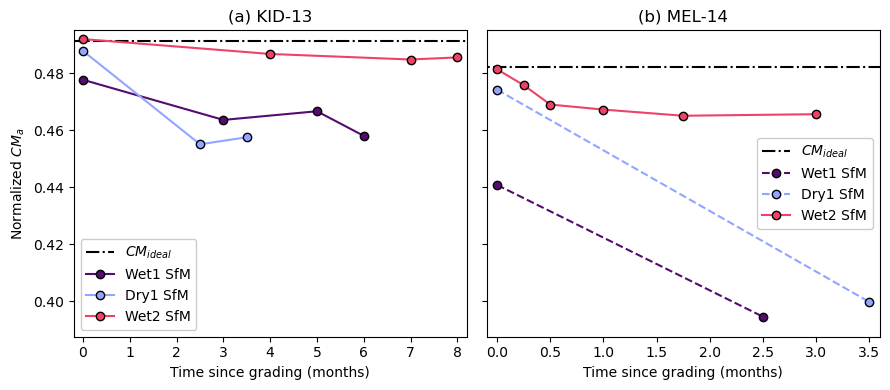

In [38]:
fig, ax =plt.subplots(1,2, figsize=(9,4),sharey=True, layout='tight')

ax[0].plot(tmax_k13_wsyr1_sfm, cm_norm_k13_wsyr1_n_sfm, '-.', color='k', label='$CM_{ideal}$')
ax[0].plot(t_k13_wsyr1_sfm, cm_wa_k13_wsyr1_n_sfm, 'o-', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[0].plot(t_k13_dsyr1_sfm, cm_wa_k13_dsyr1_n_sfm, 'o-', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[0].plot(t_k13_wsyr2_sfm, cm_wa_k13_wsyr2_n_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[0].plot(t_k13_wsyr1_lidar, cm_wa_k13_wsyr1_n_lidar, '*', markersize=7, color='#540D6E', markeredgecolor='k', label='Wet1 LiDAR')
# ax[0].plot(t_k13_dsyr1_lidar, cm_wa_k13_dsyr1_n_lidar, '*', markersize=7, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
# ax[0].plot(t_k13_wsyr2_lidar, cm_wa_k13_wsyr2_n_lidar, '*', markersize=7, color='#EE4266', markeredgecolor='k', label='Wet2 LiDAR')
ax[0].set(xlim=(-0.2,8.2), ylim=(0.3875,0.495), ylabel=('Normalized $CM_{a}$'), title='(a) KID-13')
ax[0].legend(loc='best', framealpha=1)

ax[1].plot(tmax_m14_wsyr1_sfm, cm_norm_m14_wsyr1_n_sfm, '-.', color='k', label='$CM_{ideal}$')
ax[1].plot(t_m14_wsyr1_sfm, cm_wa_m14_wsyr1_n_sfm, 'o--', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[1].plot(t_m14_dsyr1_sfm, cm_wa_m14_dsyr1_n_sfm, 'o--', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[1].plot(t_m14_wsyr2_sfm, cm_wa_m14_wsyr2_n_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[1].plot(t_m14_wsyr1_lidar, cm_wa_m14_wsyr1_n_lidar, '*', markersize=7, color='#540D6E', markeredgecolor='k', label='Wet1 LiDAR')
# ax[1].plot(t_m14_dsyr1_lidar, cm_wa_m14_dsyr1_n_lidar, '*', markersize=7, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
# ax[1].plot(t_m14_wsyr2_lidar, cm_wa_m14_wsyr2_n_lidar, '*', markersize=7, color='#EE4266', markeredgecolor='k', label='Wet2 liDAR')
ax[1].set(xlim=(-0.1,3.6), title='(b) MEL-14')
ax[1].legend(loc='best', framealpha=1)

for ax in ax.flat:
    ax.set(xlabel='Time since grading (months)')
plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig10.eps', bbox_inches='tight')
plt.show();

In [39]:
cm_wa_k13_wsyr2_n_sfm

array([0.49192399, 0.48670946, 0.48476618, 0.48549618])

In [40]:
t_k13_wsyr1_sfm = [0, 3, 5, 6]
da_wa_k13_wsyr1_sfm = np.zeros(len(k13_wsyr1_dem_files_sfm))
for i in range(len(k13_wsyr1_dem_files_sfm)):
    da_wa_k13_wsyr1_sfm[i] = np.sum(k13_wsyr1_sfm[i][-5] + k13_wsyr1_sfm[i][-2])/np.sum(k13_wsyr1_sfm[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_wsyr1_sfm.csv', da_wa_k13_wsyr1_sfm, delimiter=",", fmt='%f')

t_k13_dsyr1_sfm = [0, 2.5, 3.5]
da_wa_k13_dsyr1_sfm = np.zeros(len(k13_dsyr1_dem_files_sfm))
for i in range(len(k13_dsyr1_dem_files_sfm)):
    da_wa_k13_dsyr1_sfm[i] = np.sum(k13_dsyr1_sfm[i][-5] + k13_dsyr1_sfm[i][-2])/np.sum(k13_dsyr1_sfm[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_dsyr1_sfm.csv', da_wa_k13_dsyr1_sfm, delimiter=",", fmt='%f')

t_k13_wsyr2_sfm = [0,4,7,8]
da_wa_k13_wsyr2_sfm = np.zeros(len(k13_wsyr2_dem_files_sfm))
for i in range(len(k13_wsyr2_dem_files_sfm)):
    da_wa_k13_wsyr2_sfm[i] = np.sum(k13_wsyr2_sfm[i][-5] + k13_wsyr2_sfm[i][-2])/np.sum(k13_wsyr2_sfm[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_wsyr2_sfm.csv', da_wa_k13_wsyr2_sfm, delimiter=",", fmt='%f')

In [41]:
t_k13_wsyr1_lidar = [0, 6]
da_wa_k13_wsyr1_lidar = np.zeros(len(k13_wsyr1_dem_files_lidar))
for i in range(len(k13_wsyr1_dem_files_lidar)):
    da_wa_k13_wsyr1_lidar[i] = np.sum(k13_wsyr1_lidar[i][-5] + k13_wsyr1_lidar[i][-2])/np.sum(k13_wsyr1_lidar[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_wsyr1_lidar.csv', da_wa_k13_wsyr1_lidar, delimiter=",", fmt='%f')

t_k13_dsyr1_lidar = [0, 3.5]
da_wa_k13_dsyr1_lidar = np.zeros(len(k13_dsyr1_dem_files_lidar))
for i in range(len(k13_dsyr1_dem_files_lidar)):
    da_wa_k13_dsyr1_lidar[i] = np.sum(k13_dsyr1_lidar[i][-5] + k13_dsyr1_lidar[i][-2])/np.sum(k13_dsyr1_lidar[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_dsyr1_lidar.csv', da_wa_k13_dsyr1_lidar, delimiter=",", fmt='%f')

t_k13_wsyr2_lidar = [0, 8]
da_wa_k13_wsyr2_lidar = np.zeros(len(k13_wsyr2_dem_files_lidar))
for i in range(len(k13_wsyr2_dem_files_lidar)):
    da_wa_k13_wsyr2_lidar[i] = np.sum(k13_wsyr2_lidar[i][-4] + k13_wsyr2_lidar[i][-2])/np.sum(k13_wsyr2_lidar[i][:])
np.savetxt('/home/adalvis/github/micro_diff/da_wa_k13_wsyr2_lidar.csv', da_wa_k13_wsyr2_lidar, delimiter=",", fmt='%f')

In [42]:
t_m14_wsyr1_sfm = [0, 2.5]
da_wa_m14_wsyr1_sfm = np.zeros(len(m14_wsyr1_dem_files_sfm))
for i in range(len(m14_wsyr1_dem_files_sfm)):
    da_wa_m14_wsyr1_sfm[i] = (np.sum(m14_wsyr1_sfm[i][-7]+ m14_wsyr1_sfm[i][-2]))/(np.sum(m14_wsyr1_sfm[i][:]))
np.savetxt('/home/adalvis/github/micro_diff/da_wa_m14_wsyr1_sfm.csv', da_wa_m14_wsyr1_sfm, delimiter=",", fmt='%f')

t_m14_dsyr1_sfm = [0, 3.5]
da_wa_m14_dsyr1_sfm = np.zeros(len(m14_dsyr1_dem_files_sfm))
for i in range(len(m14_dsyr1_dem_files_sfm)):
    da_wa_m14_dsyr1_sfm[i] = (np.sum(m14_dsyr1_sfm[i][-7]+ m14_dsyr1_sfm[i][-2]))/(np.sum(m14_dsyr1_sfm[i][:]))
np.savetxt('/home/adalvis/github/micro_diff/da_wa_m14_dsyr1_sfm.csv', da_wa_m14_dsyr1_sfm, delimiter=",", fmt='%f')

t_m14_wsyr2_sfm = [0,0.25,0.5,1,1.75,3]
da_wa_m14_wsyr2_sfm = np.zeros(len(m14_wsyr2_dem_files_sfm))
for i in range(len(m14_wsyr2_dem_files_sfm)):
    da_wa_m14_wsyr2_sfm[i] = (np.sum(m14_wsyr2_sfm[i][-7]+ m14_wsyr2_sfm[i][-2]))/(np.sum(m14_wsyr2_sfm[i][:]))
np.savetxt('/home/adalvis/github/micro_diff/da_wa_m14_wsyr2_sfm.csv', da_wa_m14_wsyr2_sfm, delimiter=",", fmt='%f')

In [43]:
t_m14_wsyr1_lidar = [0]
da_wa_m14_wsyr1_lidar = np.zeros(len(m14_wsyr1_dem_files_lidar))
for i in range(len(m14_wsyr1_dem_files_lidar)):
    da_wa_m14_wsyr1_lidar[i] = (np.sum(m14_wsyr1_lidar[i][-7]+ m14_wsyr1_lidar[i][-2]))/(np.sum(m14_wsyr1_lidar[i][:]))
np.savetxt('/home/adalvis/github/micro_diff/da_wa_m14_wsyr1_lidar.csv', da_wa_m14_wsyr1_lidar, delimiter=",", fmt='%f')

t_m14_dsyr1_lidar = [0, 3.5]
da_wa_m14_dsyr1_lidar = np.zeros(len(m14_dsyr1_dem_files_lidar))
for i in range(len(m14_dsyr1_dem_files_lidar)):
    da_wa_m14_dsyr1_lidar[i] = (np.sum(m14_dsyr1_lidar[i][-7]+ m14_dsyr1_lidar[i][-2]))/(np.sum(m14_dsyr1_lidar[i][:]))
np.savetxt("/home/adalvis/github/micro_diff/da_wa_m14_dsyr1_lidar.csv", da_wa_m14_dsyr1_lidar, delimiter=",", fmt='%f')

t_m14_wsyr2_lidar = [0, 3]
da_wa_m14_wsyr2_lidar = np.zeros(len(m14_wsyr2_dem_files_lidar))
for i in range(len(m14_wsyr2_dem_files_lidar)):
    da_wa_m14_wsyr2_lidar[i] = (np.sum(m14_wsyr2_lidar[i][-7]+ m14_wsyr2_lidar[i][-2]))/(np.sum(m14_wsyr2_lidar[i][:]))
np.savetxt("/home/adalvis/github/micro_diff/da_wa_m14_wsyr2_lidar.csv", da_wa_m14_wsyr2_lidar, delimiter=",", fmt='%f')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


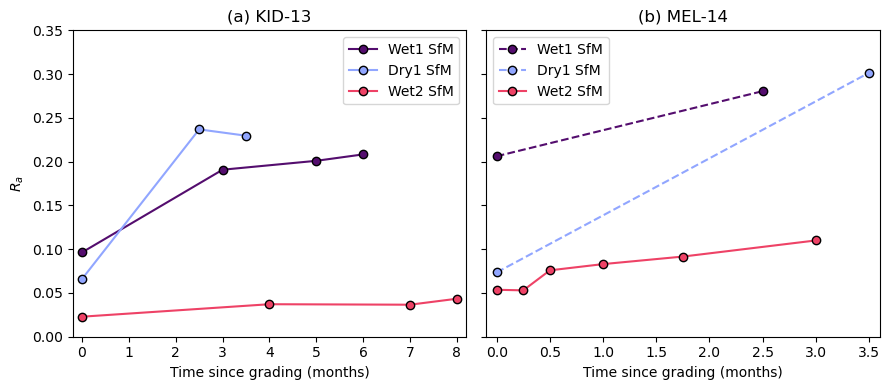

In [44]:
fig, ax =plt.subplots(1,2, figsize=(9,4), sharey=True, layout='tight')

ax[0].plot(t_k13_wsyr1_sfm, da_wa_k13_wsyr1_sfm, 'o-', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[0].plot(t_k13_dsyr1_sfm, da_wa_k13_dsyr1_sfm, 'o-', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[0].plot(t_k13_wsyr2_sfm, da_wa_k13_wsyr2_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[0].plot(t_k13_wsyr1_lidar, da_wa_k13_wsyr1_lidar, '*', markersize=7, color='#540D6E', markeredgecolor='k', label='Wet1 LiDAR')
# ax[0].plot(t_k13_dsyr1_lidar, da_wa_k13_dsyr1_lidar, '*', markersize=7, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
# ax[0].plot(t_k13_wsyr2_lidar, da_wa_k13_wsyr2_lidar, '*', markersize=7, color='#EE4266', markeredgecolor='k', label='Wet2 LiDAR')
ax[0].set(ylabel='$R_{a}$', xlim=(-0.2,8.2), ylim=(0,0.35), title='(a) KID-13')

ax[1].plot(t_m14_wsyr1_sfm, da_wa_m14_wsyr1_sfm, 'o--', color='#540D6E', markeredgecolor='k', label='Wet1 SfM')
ax[1].plot(t_m14_dsyr1_sfm, da_wa_m14_dsyr1_sfm, 'o--', color='#91A6FF', markeredgecolor='k', label='Dry1 SfM')
ax[1].plot(t_m14_wsyr2_sfm, da_wa_m14_wsyr2_sfm, 'o-', color='#EE4266', markeredgecolor='k', label='Wet2 SfM')
# ax[1].plot(t_m14_wsyr1_lidar, da_wa_m14_wsyr1_lidar, '*', markersize=7, color='#540D6E', markeredgecolor='k', label='Wet1 LiDAR')
# ax[1].plot(t_m14_dsyr1_lidar, da_wa_m14_dsyr1_lidar, '*', markersize=7, color='#91A6FF', markeredgecolor='k', label='Dry1 LiDAR')
# ax[1].plot(t_m14_wsyr2_lidar, da_wa_m14_wsyr2_lidar, '*', markersize=7, color='#EE4266', markeredgecolor='k', label='Wet2 LiDAR')
ax[1].set(xlim=(-0.1,3.6), title='(b) MEL-14')

for ax in ax.flat:
    ax.set(xlabel='Time since grading (months)')
    ax.legend()
plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig11.eps', bbox_inches='tight')
plt.show();